In [2]:
import pandas as pd
data = pd.read_csv('/Users/daniloruberti/Desktop/train.csv')

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Handling missing values
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Geography', 'Gender']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
# Normalizing numerical variables
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [4]:
data = data.drop(['Surname', 'CustomerId', 'id'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.144135,0,1,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,181449.97,0
1,-0.367706,0,1,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,49503.50,0
2,0.268974,0,1,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,184866.69,0
3,-0.941966,0,1,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,84560.88,0
4,0.743362,2,1,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,15068.83,0


In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.789287   0.000000  0.000000  0.000000
1              Decision Tree  0.795983   0.515135  0.540762  0.527637
2              Random Forest  0.858121   0.717541  0.538749  0.615423
3  Gradient Boosting Machine  0.865513   0.753629  0.537455  0.627444


/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

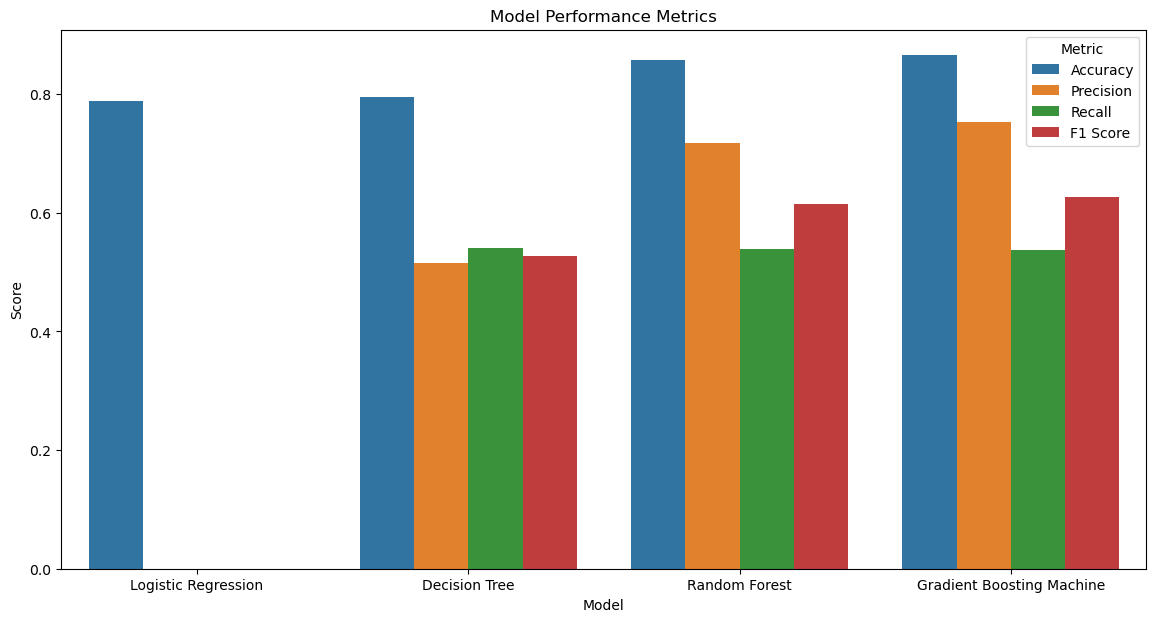

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)

# List of models for iteration
models = [
    ("Logistic Regression", logistic_regression_model),
    ("Decision Tree", decision_tree_model),
    ("Random Forest", random_forest_model),
    ("Gradient Boosting Machine", gbm_model)
]


# Dictionary to store the results
results = {}

# Manually update the Logistic Regression metrics in the `results` dictionary
results['Logistic Regression'] = {
    'Accuracy': 0.8270063925833914,
    'Precision': 0.6736401673640168,
    'Recall': 0.3472322070452912,
    'F1 Score': 0.45825426944971537
}


# Training and evaluating each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results).transpose().reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)
print(results_df)

# Melt the DataFrame to have metric names and values in separate columns
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting all metrics including those with zero values
plt.figure(figsize=(14, 7))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

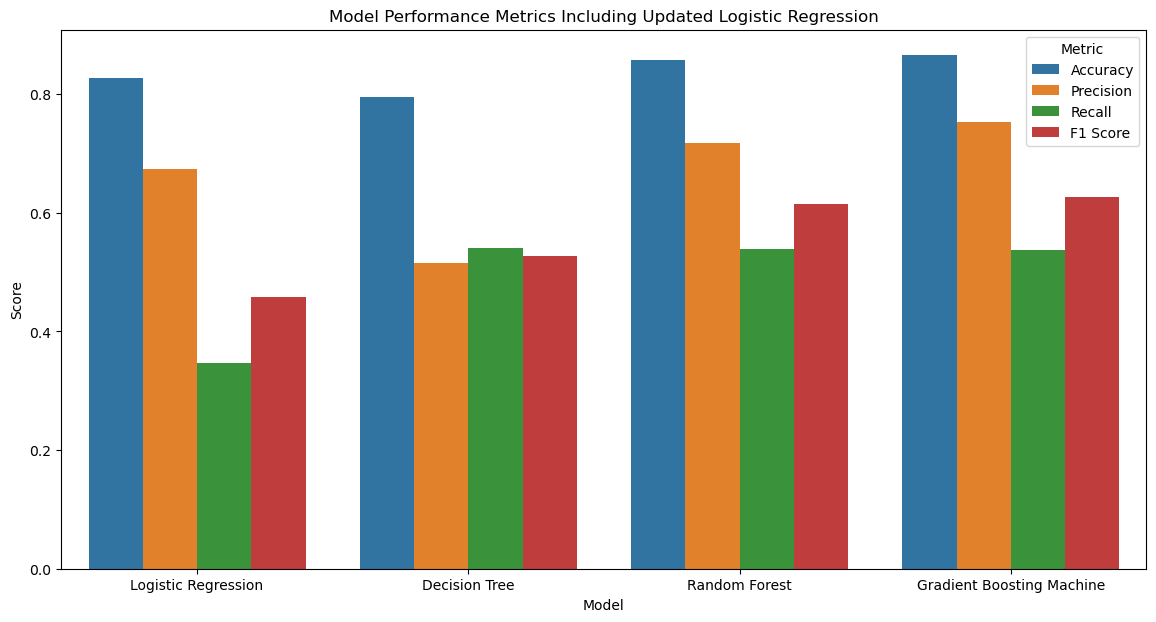

In [8]:
# Manually update the Logistic Regression metrics in the `results` dictionary
results['Logistic Regression'] = {
    'Accuracy': 0.8270063925833914,
    'Precision': 0.6736401673640168,
    'Recall': 0.3472322070452912,
    'F1 Score': 0.45825426944971537
}

results_df = pd.DataFrame(results).transpose().reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to have metric names and values in separate columns for plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting all metrics including those with zero values
plt.figure(figsize=(14, 7))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Including Updated Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

XGBoost Performance:
Accuracy: 0.8663313842518253
Precision: 0.7387793427230047
Recall: 0.5656362329259526
F1 Score: 0.6407166123778502


/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

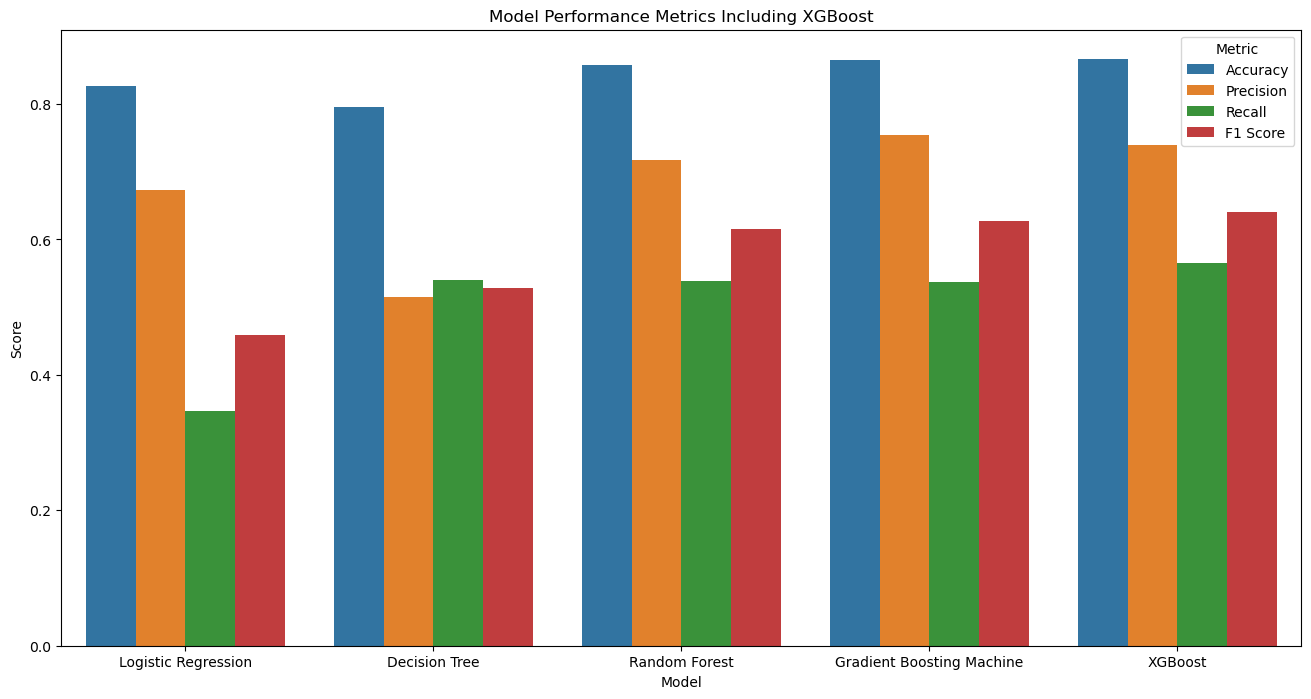

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)

results['XGBoost'] = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
}

# Print out the XGBoost performance
print("XGBoost Performance:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

# Visualize the performance of all models including XGBoost
results_df = pd.DataFrame(results).transpose().reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to have metric names and values in separate columns
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting all metrics including those with zero values
plt.figure(figsize=(16, 8))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Including XGBoost')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD


CatBoost Performance:
Accuracy: 0.8669373163268398
Precision: 0.748208405965524
Recall: 0.5554277498202732
F1 Score: 0.6375639544479288


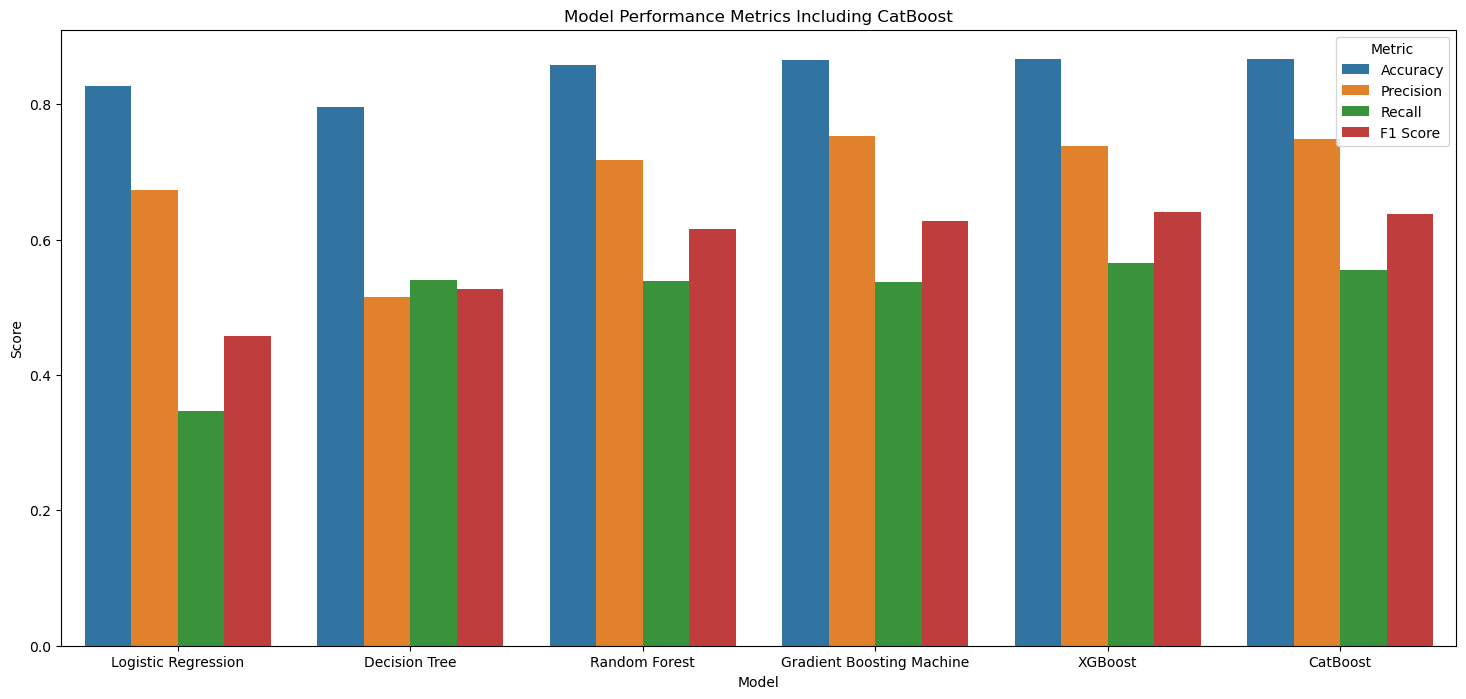

In [11]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize and train the CatBoost model
cat_model = CatBoostClassifier(random_state=42, verbose=0)  # 'verbose=0' to silence the output
cat_model.fit(X_train, y_train)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat, zero_division=0)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat, zero_division=0)

# Add the CatBoost performance to the results dictionary
results['CatBoost'] = {
    'Accuracy': accuracy_cat,
    'Precision': precision_cat,
    'Recall': recall_cat,
    'F1 Score': f1_cat
}

# Print out the CatBoost performance
print("\nCatBoost Performance:")
print("Accuracy:", accuracy_cat)
print("Precision:", precision_cat)
print("Recall:", recall_cat)
print("F1 Score:", f1_cat)


results_df = pd.DataFrame(results).transpose().reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to have metric names and values in separate columns
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting all metrics including those with zero values
plt.figure(figsize=(18, 8))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Including CatBoost')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/daniloruberti/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

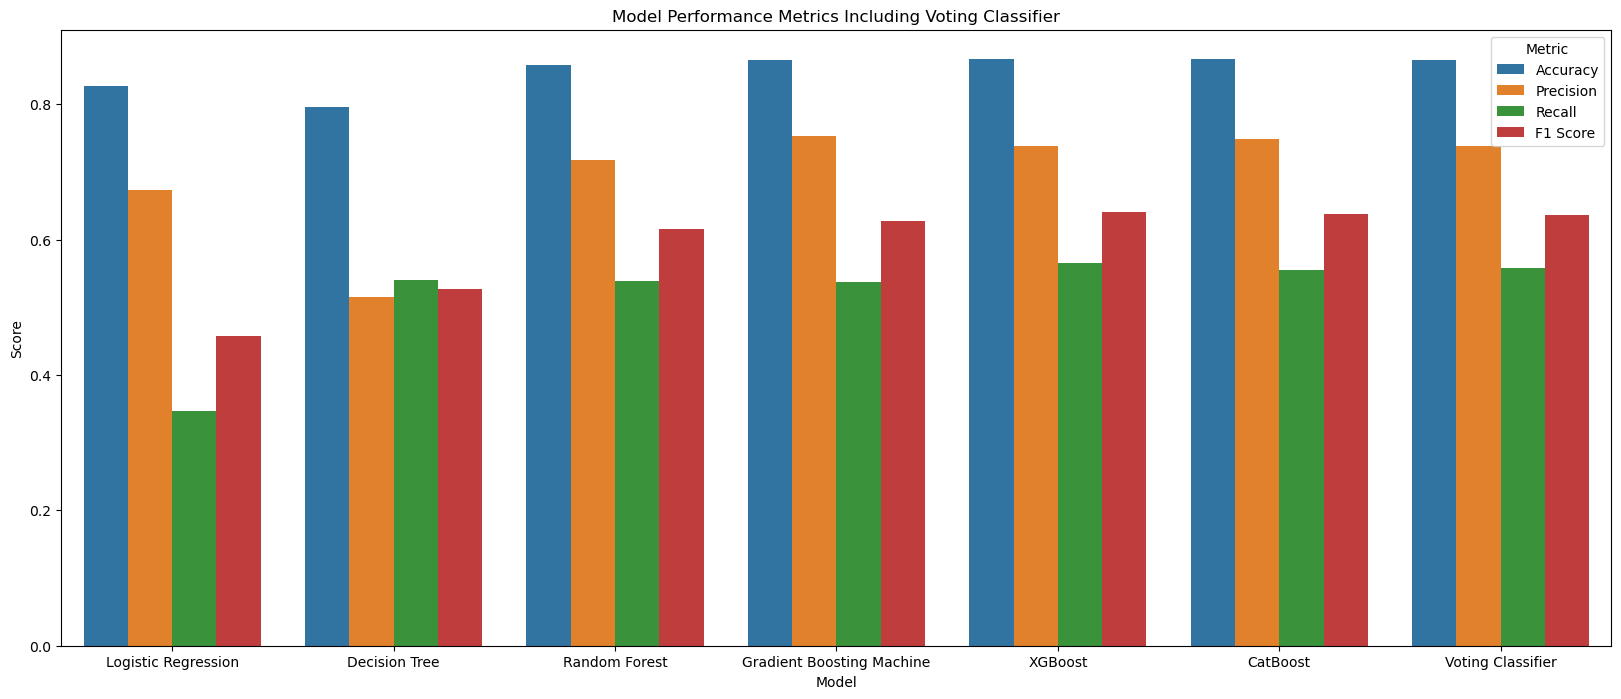

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('rf', random_forest_model),  # the random forest model
    ('xgb', xgb_model)            # the XGBoost model
], voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions with the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, zero_division=0)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, zero_division=0)

# Add the Voting Classifier performance to the results dictionary
results['Voting Classifier'] = {
    'Accuracy': accuracy_voting,
    'Precision': precision_voting,
    'Recall': recall_voting,
    'F1 Score': f1_voting
}

# Visualize the performance of all models including the Voting Classifier
# Convert the updated results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results).transpose().reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to have metric names and values in separate columns
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting all metrics including those with zero values
plt.figure(figsize=(20, 8))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Including Voting Classifier')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

In [15]:
import pprint

pprint.pprint(results)

{'CatBoost': {'Accuracy': 0.8669373163268398,
              'F1 Score': 0.6375639544479288,
              'Precision': 0.748208405965524,
              'Recall': 0.5554277498202732},
 'Decision Tree': {'Accuracy': 0.7959826703426546,
                   'F1 Score': 0.5276374859708194,
                   'Precision': 0.515134913025613,
                   'Recall': 0.5407620416966211},
 'Gradient Boosting Machine': {'Accuracy': 0.865513375950556,
                               'F1 Score': 0.6274443978178766,
                               'Precision': 0.7536290322580645,
                               'Recall': 0.5374550682961898},
 'Logistic Regression': {'Accuracy': 0.8270063925833914,
                         'F1 Score': 0.45825426944971537,
                         'Precision': 0.6736401673640168,
                         'Recall': 0.3472322070452912},
 'Random Forest': {'Accuracy': 0.8581210046353803,
                   'F1 Score': 0.6154225178615422,
                   'Precision': 

In [18]:
import pandas as pd

results_df = pd.DataFrame(results).transpose()

top_models_accuracy = results_df.sort_values(by='Accuracy', ascending=False).head(2)
top_models_precision = results_df.sort_values(by='Precision', ascending=False).head(2)
top_models_recall = results_df.sort_values(by='Recall', ascending=False).head(2)
top_models_f1 = results_df.sort_values(by='F1 Score', ascending=False).head(2)

# Now you can call your function with these top models DataFrames
print_top_models_for_each_metric(top_models_accuracy, top_models_precision, top_models_recall, top_models_f1)


Top 2 Models for Each Evaluation Metric:

Accuracy:
  CatBoost: 0.8669
  XGBoost: 0.8663

Precision:
  Gradient Boosting Machine: 0.7536
  CatBoost: 0.7482

Recall:
  XGBoost: 0.5656
  Voting Classifier: 0.5586

F1 Score:
  XGBoost: 0.6407
  CatBoost: 0.6376
